## **Import Necessary Libraries**

In [37]:
!pip install xgboost

In [113]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import xgboost as xgb
from matplotlib import pyplot as plt
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

## **Importing Data**

In [39]:
cancer_data = load_breast_cancer()
cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [40]:
dataset = pd.DataFrame(data=cancer_data.data,columns =cancer_data.feature_names )
dataset['Target'] = cancer_data.target

In [41]:
dataset 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## **Data Understanding**

In [42]:
dataset.shape

(569, 31)

In [43]:
dataset.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [44]:
dataset.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

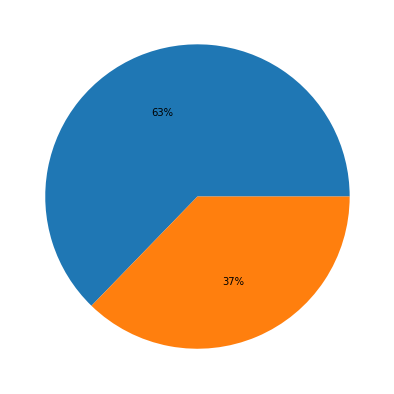

In [45]:
plt.figure(figsize=(10,7),)
plt.pie(dataset['Target'].value_counts(),autopct='%1.0f%%',data= dataset)
plt.show()

## **Model Building**

In [72]:
x = dataset.drop(labels='Target',axis = 1)
y = dataset[['Target']]


In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 12, stratify = y)

In [63]:
x_train.shape,y_train.shape

((455, 30), (455, 1))

In [64]:
x_test.shape,y_test.shape

((114, 30), (114, 1))

## **Model Training**

In [133]:
xgb_Model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,objective="binary:logistic",n_jobs=-1,random_state=12)
xgb_Model.fit(x_train,y_train)

XGBClassifier(n_jobs=-1, random_state=12)

## **Model Testing**

In [136]:
y_train_pred = xgb_Model.predict(x_train)
y_train_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,

In [137]:
y_test_pred = xgb_Model.predict(x_test)
y_test_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0])

## **Model Evaluation**

In [138]:
accuracy_score(y_test_pred,y_test)

0.9736842105263158

In [139]:
roc_auc_score(y_test_pred,y_test)

0.98

In [140]:
confusion_matrix(y_test_pred,y_test)

array([[39,  0],
       [ 3, 72]])

#### **Feature Engineering**

In [141]:
REF_classifier = RFE(estimator=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,n_jobs=-1),n_features_to_select=None)
REF_classifier.fit(x_train,y_train)

RFE(estimator=XGBClassifier(n_jobs=-1))

In [142]:
REF_selected_features = REF_classifier.get_support()
REF_selected_features

array([ True,  True, False,  True,  True, False,  True,  True, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True, False, False])

In [143]:
x_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [144]:
REF_Final_Features = x_train.columns[REF_selected_features]
REF_Final_Features

Index(['mean radius', 'mean texture', 'mean area', 'mean smoothness',
       'mean concavity', 'mean concave points', 'radius error',
       'perimeter error', 'area error', 'worst texture', 'worst perimeter',
       'worst area', 'worst compactness', 'worst concavity',
       'worst concave points'],
      dtype='object')

In [145]:
len(REF_Final_Features)

15

In [155]:
x_train_imp_features = REF_classifier.transform(x_train)
x_test_imp_features = REF_classifier.transform(x_test)

In [159]:
X_train = x_train_imp_features = pd.DataFrame(x_train_imp_features,columns =REF_Final_Features )
X_train

,mean radius,mean texture,mean area,mean smoothness,mean concavity,mean concave points,radius error,perimeter error,area error,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
0,13.160,20.54,538.7,0.07335,0.018000,0.012560,0.3237,2.326,26.07,28.46,95.29,648.3,0.16460,0.07698,0.04195
1,9.787,19.94,294.5,0.10240,0.006829,0.007937,0.3350,2.132,20.05,26.29,68.81,366.1,0.09473,0.02049,0.02381
2,13.940,13.17,594.2,0.12480,0.101000,0.066150,0.5461,4.091,44.74,15.38,94.52,653.3,0.13640,0.15590,0.10150
3,9.436,18.32,278.6,0.10090,0.027100,0.014060,0.5079,3.267,30.48,25.02,75.79,439.6,0.10490,0.11440,0.05052
4,25.730,17.46,2010.0,0.11490,0.336800,0.191300,0.9948,7.222,153.10,23.58,229.30,3234.0,0.59370,0.64510,0.27560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,19.550,28.77,1207.0,0.09260,0.178400,0.114400,0.8426,7.158,106.40,36.27,178.60,1926.0,0.53290,0.42510,0.19410
451,13.200,17.43,541.6,0.07215,0.043360,0.011050,0.1630,0.873,13.56,27.82,88.28,602.0,0.15080,0.22980,0.04970
452,25.220,24.91,1878.0,0.10630,0.333900,0.184500,0.8973,7.382,120.00,33.62,211.70,2562.0,0.60760,0.64760,0.28670
453,12.870,16.21,512.2,0.09425,0.039000,0.016150,0.2345,1.546,18.24,23.64,89.27,597.5,0.18080,0.19920,0.05780


In [149]:
x_test_imp_features

array([[1.940e+01, 2.350e+01, 1.155e+03, ..., 2.968e-01, 3.458e-01,
        1.564e-01],
       [1.959e+01, 2.500e+01, 1.191e+03, ..., 1.845e-01, 3.977e-01,
        1.466e-01],
       [1.193e+01, 2.153e+01, 4.386e+02, ..., 2.399e-01, 1.503e-01,
        7.247e-02],
       ...,
       [1.480e+01, 1.766e+01, 6.748e+02, ..., 1.881e-01, 2.060e-01,
        8.308e-02],
       [1.337e+01, 1.639e+01, 5.535e+02, ..., 2.531e-01, 3.308e-01,
        8.978e-02],
       [1.530e+01, 2.527e+01, 7.324e+02, ..., 6.110e-01, 6.335e-01,
        2.024e-01]])

In [153]:
X_test = pd.DataFrame(x_test_imp_features,columns =REF_Final_Features )
X_test

,mean radius,mean texture,mean area,mean smoothness,mean concavity,mean concave points,radius error,perimeter error,area error,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
0,19.400,23.50,1155.0,0.10270,0.20490,0.08886,0.5243,4.037,60.41,30.53,144.90,1417.0,0.2968,0.3458,0.15640
1,19.590,25.00,1191.0,0.10320,0.16550,0.09063,0.4674,2.916,56.18,30.96,139.80,1421.0,0.1845,0.3977,0.14660
2,11.930,21.53,438.6,0.09768,0.03328,0.02008,0.3118,2.000,24.79,26.15,87.54,583.0,0.2399,0.1503,0.07247
3,8.734,16.84,234.3,0.10390,0.00000,0.00000,0.5169,3.167,28.85,22.80,64.01,317.0,0.1310,0.0000,0.00000
4,11.900,14.65,432.8,0.11520,0.03710,0.03003,0.3962,3.021,25.03,16.51,86.26,509.6,0.2517,0.0942,0.06042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,20.180,19.54,1250.0,0.11330,0.21330,0.12590,0.4331,3.008,52.49,25.07,146.00,1479.0,0.2942,0.5308,0.21730
110,15.460,19.48,748.9,0.10920,0.14660,0.08087,0.4743,3.094,48.31,26.00,124.90,1156.0,0.2394,0.3791,0.15140
111,14.800,17.66,674.8,0.09179,0.04069,0.02260,0.2204,1.482,19.75,22.74,105.90,829.5,0.1881,0.2060,0.08308
112,13.370,16.39,553.5,0.07115,0.08092,0.02800,0.1639,1.223,14.66,22.75,91.99,632.1,0.2531,0.3308,0.08978


In [179]:
X_train.shape,X_test.shape

((455, 15), (114, 15))

In [180]:
def RunXGBClassifier(x_train,x_test,y_train,y_test):
    xgb_Model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,objective="binary:logistic",n_jobs=-1,random_state=12)
    xgb_Model.fit(x_train,y_train)
    print('Accuracy Score    :',accuracy_score(y_test_pred,y_test))
    print('ROC_AUC_score     :',roc_auc_score(y_test_pred,y_test))
    print('Confusion Matrix  :\n',confusion_matrix(y_test_pred,y_test))

In [181]:
RunXGBClassifier(x_train,x_test,y_train,y_test) #30 columns

Accuracy Score    : 0.9736842105263158
ROC_AUC_score     : 0.98
Confusion Matrix  :
 [[39  0]
 [ 3 72]]


In [182]:
RunXGBClassifier(X_train,X_test,y_train,y_test) #15 columns

Accuracy Score    : 0.9736842105263158
ROC_AUC_score     : 0.98
Confusion Matrix  :
 [[39  0]
 [ 3 72]]


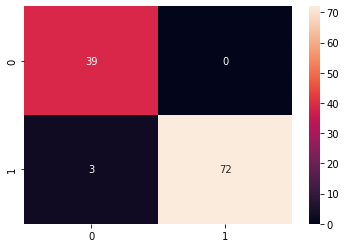

In [183]:
sns.heatmap(confusion_matrix(y_test_pred,y_test),annot= True)
plt.show()

## **Model Deployement**

In [175]:
from pickle import dump

In [185]:
dump( xgb_Model,open('xgb_model_pkl','wb'))

In [186]:
from pickle import load

In [188]:
Pickle_file = load(open('xgb_model_pkl','rb'))